In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [43]:
# Loading data
file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path)
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [44]:
df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [45]:
#filter for currencies that are currently being traded
df_drop_trading=df.loc[(df['IsTrading']==True)]
df_drop_trading

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [46]:
df_drop_trading.count()

Unnamed: 0         1144
CoinName           1144
Algorithm          1144
IsTrading          1144
ProofType          1144
TotalCoinsMined     685
TotalCoinSupply    1144
dtype: int64

In [47]:
#drop the IsTrading column from the dataframe.
df_drop_trading=df_drop_trading.drop("IsTrading", axis=1)
df_drop_trading

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [48]:
# Count of rows with null values
df_drop_trading.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [49]:
# Delete rows with null values
df_trading = df_drop_trading.dropna()

In [50]:
#Check data again, we drop the row which column value is null
df_trading.count()

Unnamed: 0         685
CoinName           685
Algorithm          685
ProofType          685
TotalCoinsMined    685
TotalCoinSupply    685
dtype: int64

In [51]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
df_filter=df_trading.loc[(df_trading['TotalCoinsMined']>0)]
df_filter  #the row drop from 685 to 532

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [52]:
#Drop the coin names do not contribute to the analysis of the data
df_clean=df_filter.drop(["Unnamed: 0", "CoinName"], axis=1)
df_clean

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [53]:
#convert the remaining features with text values, Algorithm and ProofType, into numerical data.
X=pd.get_dummies(df_clean)
X #Feature colmuns increase from 4 to 377

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#Standardize dataset
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11710817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [59]:
# Applying PCA to reduce dimensions from 377 to 100
# Initialize PCA model
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)

# Get  principal components for the X_scaled data.
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-2.67092248e-01, -1.16293969e-01, -4.68903877e-16, ...,
         7.79711472e-02, -4.64208007e-02,  2.91689105e-02],
       [-2.49924699e-01, -1.17272732e-01, -7.79235638e-16, ...,
         7.79379349e-02, -4.66615892e-02,  2.92924084e-02],
       [ 3.14746498e-01, -2.86187718e-03,  3.45626396e-15, ...,
         9.15078959e-02,  1.08379224e-02, -5.47007300e-01],
       ...,
       [-6.67192566e-02, -3.11211774e-01,  9.87537839e-15, ...,
        -1.92953306e-01, -2.86484827e-03, -4.75674226e-01],
       [-2.90507995e-01, -2.45950491e-01,  7.19012415e-15, ...,
        -1.22194388e+00, -3.87490282e-01,  5.19084699e-01],
       [-1.99343294e-01, -6.23600551e-02, -3.00011857e-15, ...,
         7.20219721e-02, -1.15050128e-01, -7.17394653e-02]])

In [60]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.00839215, 0.00799006, 0.00797255, 0.00797255, 0.00794421,
       0.00741891, 0.00696609, 0.00687449, 0.00656659, 0.0061131 ,
       0.00588744, 0.00575784, 0.00569   , 0.00555906, 0.00549437,
       0.00532247, 0.00532026, 0.00531503, 0.00531503, 0.00531503,
       0.00531503, 0.00531503, 0.00531503, 0.00531488, 0.00531089,
       0.00527432, 0.00523105, 0.00521782, 0.00508932, 0.00501107,
       0.00498244, 0.00496689, 0.0049616 , 0.00491607, 0.00487546,
       0.00485005, 0.00483744, 0.00482475, 0.00478222, 0.00475574,
       0.00466862, 0.00465538, 0.00462004, 0.00460902, 0.0045821 ,
       0.0045637 , 0.00456113, 0.00454578, 0.00454094, 0.00453147,
       0.00448855, 0.00447791, 0.00446873, 0.00440764, 0.00439661,
       0.00427716, 0.00424332, 0.00418783, 0.00405474, 0.00401174,
       0.00393489, 0.00380768, 0.00379098, 0.00377029, 0.00374979,
       0.00364987, 0.00358469, 0.00355848, 0.00349388, 0.00344452,
       0.00340763, 0.00316666, 0.00298865, 0.00276281, 0.00270

In [61]:
#reduce the dataset dimensions with t-SNE and visually inspect the results. 
from sklearn.manifold import TSNE
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(X_pca)

In [62]:
# The dataset has 2 columns
tsne_features.shape

(532, 2)

In [63]:
tsne_features

array([[ -9.68578  ,  -4.491155 ],
       [ -6.6558385,   2.8877645],
       [ -7.956241 ,   9.500514 ],
       ...,
       [  3.4793587,   4.7032647],
       [  1.9274906,  11.221337 ],
       [  4.482871 , -19.392727 ]], dtype=float32)

In [64]:
# Prepare to plot the dataset
# The first column of transformed features
X['x'] = tsne_features[:,0]

# The second column of transformed features
X['y'] = tsne_features[:,1]

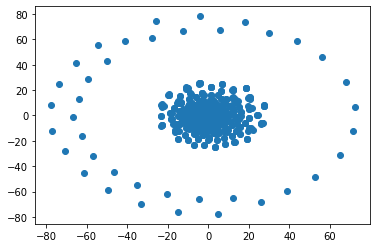

In [65]:
# Visualize the clusters
plt.scatter(X['x'], X['y'])
plt.show()

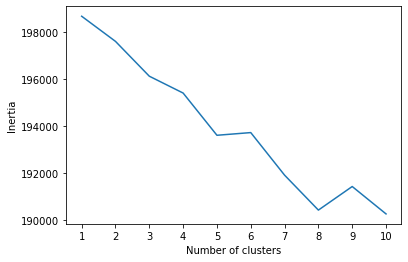

In [66]:
#Create an elbow plot to identify the best number of clusters. 
from sklearn.cluster import KMeans
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## By using t-SNE
I got 2 cluster which it's really interesting!! Like moon outside and sun inside the moon, which may mean there   has lots of noise in the dataset.
 
I run t-SNE several times, I got different chart, it's really interesting but the chart are similar like one cluster in the center, and other point around the center.
 
## KMeans
After that using KMeans by fit the pca dataset, we got elbow plot but hrad to siad that which point is the best n_clusters? Maybe we should run the model more than 10 which mean range (1,20), and see that if we can get better result.
